In [ ]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta
import warnings
warnings.simplefilter("ignore")
# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft
import matplotlib.gridspec as gridspec

client = tt.startdask(nthreads=1,n_workers = 52)

client

<Client: 'tcp://127.0.0.1:37121' processes=52 threads=52, memory=416.00 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 52
Total threads: 52,Total memory: 416.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37121,Workers: 52
Dashboard: /proxy/8787/status,Total threads: 52
Started: Just now,Total memory: 416.00 GiB
Comm: tcp://127.0.0.1:36385,Total threads: 1
Dashboard: /proxy/42455/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:38457,


2025-05-20 17:42:11,288 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:39187'.
2025-05-20 17:42:11,291 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:37489'.
2025-05-20 17:42:11,294 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:43011'.
2025-05-20 17:42:11,353 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:42081'.
2025-05-20 17:42:11,354 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:46535'.
2025-05-20 17:42:11,384 - distributed.nanny - WARNING - Restarting worker
2025-05-20 17:42:11,388 - distributed.nanny - WARNING - Restarting worker
2025-05-20 17:42:11,393 - distributed.nanny - WARNING - Restarting worker
2025-05-20 17:42:11,399 - distributed.nanny - WARNING - Restarting worker
2025-05-20 17:42:11,407 - distributed.nanny - WARNING - Res

# Mode 1 anomaly line plots below 3 panels of mode 1 propagation per resolution

In [ ]:

data = {}
for expt in ["full-10","beamless-10","smooth-10","beamless-20","smooth-20","full-20","full-40","beamless-40","smooth-40"]:
# for expt in ["full-40","beamless-40","smooth-40"]:
    path = Path(f"/scratch/nm03/ab8992/april-manytimes") / expt
    bathy = xr.open_dataset(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc")
    times = os.listdir(path)
    if "40" in expt:
        t0 = "t0-4216"
    else:
        t0 = "t0-22000"
    data[expt] = xr.merge(
    [
        xr.open_dataset(path / t0 / "EF_alongbeam.nc",decode_times= False).rename({"EF":"EF_alongbeam"}).mean("time").load(),
        xr.open_dataset(path / t0 / "EF_acrossbeam.nc",decode_times= False).rename({"EF":"EF_acrossbeam"}).mean("time").load(),
        xr.open_dataset(path / t0 / "EF_alongbeam_forward.nc",decode_times= False),
        xr.open_dataset(path / t0 / "EF_alongbeam_backward.nc",decode_times= False),
        xr.open_dataset(path / t0 / "EF_alongbeam_xterm.nc",decode_times= False),
        xr.open_dataset(path / t0 / "KE_forward.nc",decode_times= False,decode_cf = False),
        xr.open_dataset(path / t0 / "KE_backward.nc",decode_times= False,decode_cf = False),
        xr.open_dataset(path / t0 / "KE_cross.nc",decode_times= False,decode_cf = False),
        bathy.rename({"depth":"bathy"}) * -1
     ]
).expand_dims({"time":[t0.split("t0-")[1]]})
    for i in range(len(times)):
        if times[i] == t0:
            continue
        try:
            data[expt] = xr.concat(
            [
                data[expt],
                xr.merge(
                    [
                        xr.open_dataset(path / times[i] / "EF_alongbeam.nc",decode_times= False,decode_cf = False).rename({"EF":"EF_alongbeam"}).mean("time").load(),
                        xr.open_dataset(path / times[i] / "EF_acrossbeam.nc",decode_times= False,decode_cf = False).rename({"EF":"EF_acrossbeam"}).mean("time").load(),
                        xr.open_dataset(path / times[i] / "EF_alongbeam_forward.nc",decode_times= False,decode_cf = False),
                        xr.open_dataset(path / times[i] / "EF_alongbeam_backward.nc",decode_times= False,decode_cf = False),
                        xr.open_dataset(path / times[i] / "EF_alongbeam_xterm.nc",decode_times= False,decode_cf = False),
                        xr.open_dataset(path / times[i] / "KE_forward.nc",decode_times= False,decode_cf = False),
                        xr.open_dataset(path / times[i] / "KE_backward.nc",decode_times= False,decode_cf = False),
                        xr.open_dataset(path / times[i] / "KE_cross.nc",decode_times= False,decode_cf = False),
                        # xr.open_dataset(path / times[i] / "EF_acrossbeam_forward.nc",decode_times= False),
                        # xr.open_dataset(path / times[i] / "EF_acrossbeam_backward.nc",decode_times= False),
                        # xr.open_dataset(path / times[i] / "EF_acrossbeam_xterm.nc",decode_times= False),
                        bathy.rename({"depth":"bathy"}) * -1
                    ]
                ).expand_dims({"time":[times[i].split("t0-")[1]]}),
            ],
            dim = "time"
            )
        except Exception as e:
            print(f"Error processing time {times[i]} for experiment {expt}: {e}")

    data[expt] = data[expt].mean("time")


Error processing time t0-7560 for experiment full-40: [Errno 2] No such file or directory: '/scratch/nm03/ab8992/april-manytimes/full-40/t0-7560/EF_alongbeam.nc'
Error processing time t0-4680 for experiment full-40: [Errno 2] No such file or directory: '/scratch/nm03/ab8992/april-manytimes/full-40/t0-4680/EF_alongbeam.nc'
Error processing time t0-5400 for experiment full-40: [Errno 2] No such file or directory: '/scratch/nm03/ab8992/april-manytimes/full-40/t0-5400/EF_alongbeam.nc'
Error processing time t0-6120 for experiment full-40: [Errno 2] No such file or directory: '/scratch/nm03/ab8992/april-manytimes/full-40/t0-6120/EF_alongbeam.nc'
Error processing time t0-8280 for experiment full-40: [Errno 2] No such file or directory: '/scratch/nm03/ab8992/april-manytimes/full-40/t0-8280/EF_alongbeam.nc'
Error processing time t0-9720 for experiment full-40: [Errno 2] No such file or directory: '/scratch/nm03/ab8992/april-manytimes/full-40/t0-9720/EF_alongbeam.nc'
Error processing time t0-900

# MODE 1 COMPARISON PLOTS

Have an along-beam anomaly 

         3.8 W/m per m
         2.7 W/m per m
         2.1 W/m per m


Text(0.5, 0, 'Distance along beam (km)')

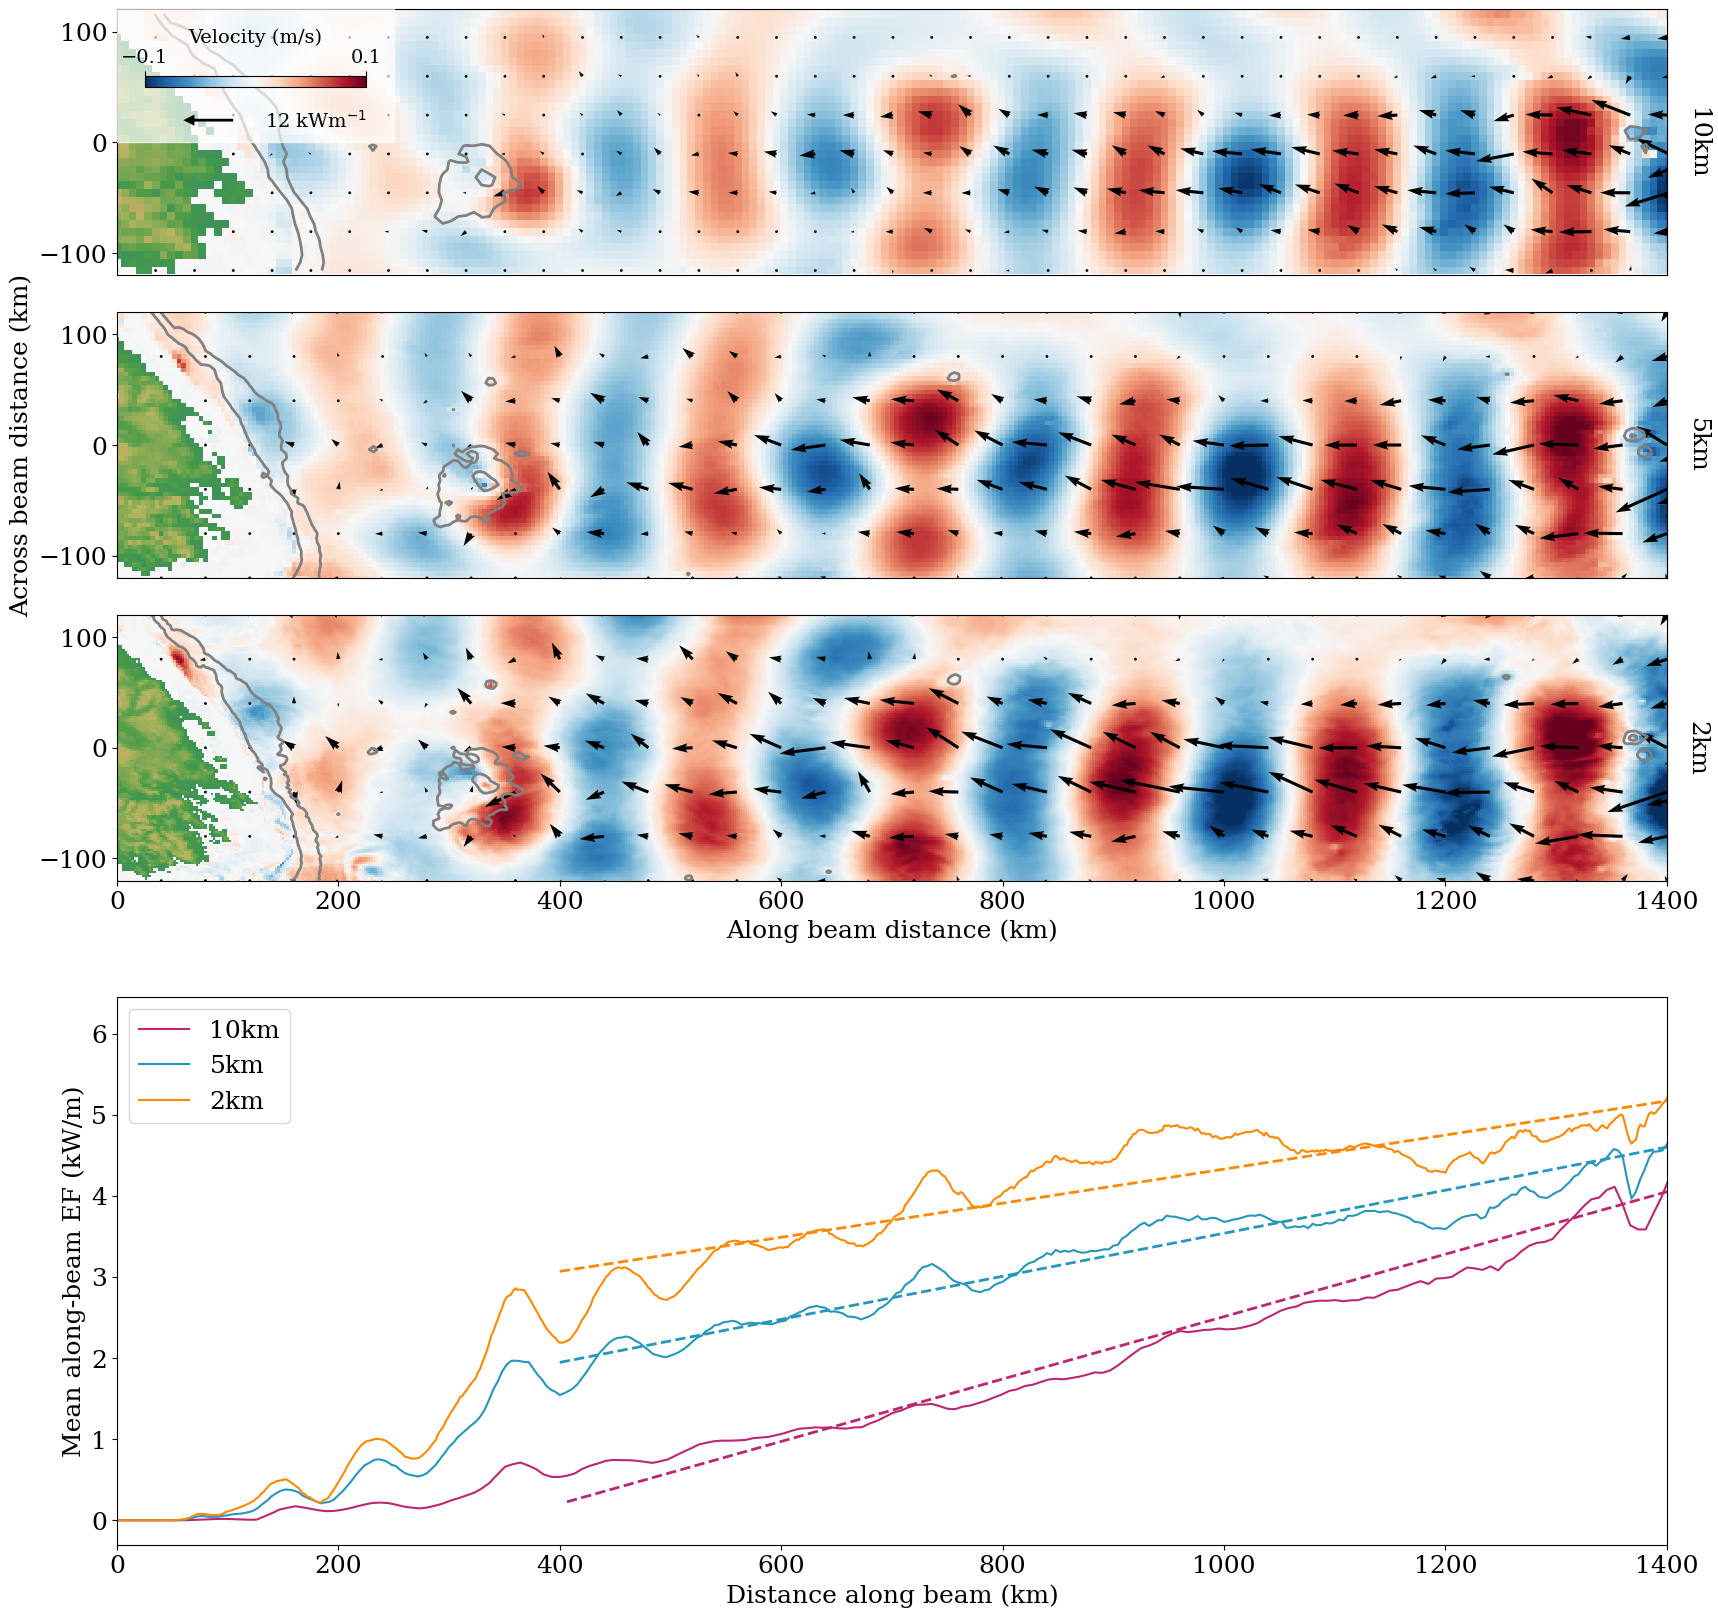

In [103]:

import matplotlib.gridspec as gridspec
font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

def plot_KE_quiver(expt,ax,mode = 0,xlim = slice(None,None),ylim = slice(None,None),scale = 3000,umax = 1):
    # expt = "full-20"
    alongbeam = data[expt].EF_alongbeam
    acrossbeam = data[expt].EF_acrossbeam
    u = xr.open_mfdataset(f"/scratch/nm03/ab8992/test/tmpstorage/{expt}/u_*.nc").u.isel(mode = mode)
    t0 = 22000
    if "40" in expt:
        t0 = 4216
    vmode = xr.open_dataset(f"/g/data/nm03/ab8992/postprocessed/{expt}/vertical_eigenfunctions/vmode-t0-{t0}.nc").U

    u *= vmode.isel(mode = mode).sel(zl = 50,method = "nearest")

    alongbeam = alongbeam.sel(xb = xlim,yb = ylim).isel(mode = mode)
    acrossbeam = acrossbeam.sel(xb = xlim,yb = ylim).isel(mode = mode)

    if "mode" in alongbeam.dims:
        alongbeam = alongbeam.sum("mode")
        acrossbeam = acrossbeam.sum("mode")
    if "mode" in u.dims:
        u = u.sum("mode")

    # np.sqrt(acrossbeam**2 + alongbeam**2).sum("mode").plot(ax = ax)
    yspacing = 5
    xspacing = 5
    if "20" in expt:
        yspacing,xspacing = yspacing * 2, xspacing * 2
    elif "40" in expt:
        yspacing,xspacing = yspacing * 4, xspacing * 4
    _yb = acrossbeam.yb[::yspacing]
    _xb = acrossbeam.xb[::xspacing]
    _along = (alongbeam )[::yspacing,::xspacing]
    _across = (acrossbeam)[::yspacing,::xspacing]

    # print(expt,np.mean(magnitude.sel(xb = slice(100,175)).values),sep = "\t")
    t0 = 50
    if "40" in expt:
        t0 = 49 ## Correct phase for 40th so the y line up 
    u.isel(time = t0).plot(ax = ax,cmap ="RdBu",add_colorbar = False,vmax = umax,vmin = -1 * umax)
    # print(magnitude)
    ax.quiver(_xb, _yb, _along, _across, color="black", scale=scale,scale_units = "width",width = 0.002)
    tt.plot_topo(ax,xr.open_dataset(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc").depth * -1)

    # ax.set_ylim(-120,120)
    ax.set_xlim(0,None)
    ax.set_xlabel("")
    ax.set_ylabel("")

    
fig = plt.figure(figsize = (20,20))
gs = gridspec.GridSpec(5, 1, height_ratios=[1, 1, 1,0.2,2],hspace = 0.1,wspace = 0.1)

ax = [fig.add_subplot(gs[i]) for i in range(3)]
ax = np.array(ax)
ax_lineplot = fig.add_subplot(gs[4])

umax = 0.1
scale = 250000

for i,expt in enumerate(["full-10","full-20","full-40"]):
    plot_KE_quiver(expt,ax[i],xlim = slice(0,None),ylim = slice(None,None),mode = 0,scale = scale,umax = umax)
    data[expt].bathy.plot.contour(ax = ax[i],levels = [-2700,-1500],colors = ["grey","grey"],linewidths = 2,linestyles = ["solid"])

for i,a in enumerate(ax.flatten()):
    a.set_title("")
    a.set_xlabel("")
    a.set_aspect("equal")
    if i < 2:
        a.set_xticks([])
    a.set_ylabel("")
    a.set_yticks([])

    b = a.secondary_yaxis('right')
    b.set_ylabel('')
    a.set_yticks([-100,0,100])
    b.set_yticks([])
    if i == 0:
        b.set_ylabel("10km",rotation = 270,labelpad = 30)
    elif i == 1:
        b.set_ylabel("5km",rotation = 270,labelpad = 30)
    elif i == 2:
        b.set_ylabel("2km",rotation = 270,labelpad = 30)
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)


ax[0].set_title("")
ax[2].set_xlabel("Along beam distance (km)")
ax[1].set_ylabel("Along beam distance (km)")
ax[1].set_ylabel("Across beam distance (km)")

efmax = 12
## Add our legend
patch = ax[0].add_patch(matplotlib.patches.Rectangle((0, 0), 250, 230, color='white', alpha=0.7))
cax1 = ax[0].inset_axes([25, 50, 200, 10],transform=ax[0].transData)  # Adjust size and location
patch.set_zorder(9)
cax1.set_zorder(10)  # Bring the patch to the front
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="RdBu_r", norm=plt.Normalize(vmin=-1 * umax, vmax=umax)),
    cax=cax1,
    orientation='horizontal',
    location = "top",
    label = "Velocity (m/s)",
)
cbar.set_ticks([-umax,umax])

cax1.tick_params(labelsize=14, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
cax1.xaxis.label.set_size(14)  # Set font size for colorbar label
cax1.xaxis.label.set_color("black")  # Set label color to black
ax[0].annotate('', xy=(60, 20), xytext=(105, 20),
            arrowprops=dict(facecolor="black", width=2, headwidth=8, headlength = 8, edgecolor="none")).set_zorder(12)
ax[0].text(180, 20, str(efmax) + r" kWm$^{-1}$", color = "black", fontsize = 14, ha = "center", va = "center").set_zorder(12)


lineplot_colours = ['#be2573','#2596be','#ff8800']
m1_10 = (-1 * data[f"full-10"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000
m1_20 = (-1 * data[f"full-20"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000
m1_40 = (-1 * data[f"full-40"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000

# m1_10 = (-1 * data[f"full-10"].EF_alongbeam_forward + data[f"beamless-10"].EF_alongbeam_forward).isel(mode = 0).sel(yb = slice(-100,100),xb = slice(0,None)).mean("yb")
# m1_20 = (-1 * data[f"full-20"].EF_alongbeam_forward + data[f"beamless-20"].EF_alongbeam_forward).isel(mode = 0).sel(yb = slice(-100,100),xb = slice(0,None)).mean("yb")
# m1_40 = (-1 * data[f"full-40"].EF_alongbeam_forward + data[f"beamless-40"].EF_alongbeam_forward).isel(mode = 0).sel(yb = slice(-100,100),xb = slice(0,None)).mean("yb")

## Add lines of best fit to the along beam from 1400 through to 600 before Rise interactions

for i,d in enumerate([m1_10,m1_20,m1_40]):
    d = d.sel(xb = slice(400,None))

    linregress_result = scipy.stats.linregress(d.xb.values, d.values)
    print(f"{linregress_result.slope * 1000:>12.1f} W/m per m")
    ax_lineplot.plot(d.xb.values, linregress_result.intercept + linregress_result.slope * d.xb.values, color = lineplot_colours[i], linestyle = "--", linewidth = 2)
    




m1_10.plot(ax = ax_lineplot,label = "10km",color = lineplot_colours[0])
m1_20.plot(ax = ax_lineplot,label = "5km",color = lineplot_colours[1])
m1_40.plot(ax = ax_lineplot,label = "2km",color = lineplot_colours[2])
ax_lineplot.legend()
ax_lineplot.set_title("")
ax_lineplot.set_xlim(0,1400)
ax_lineplot.set_ylabel("Mean along-beam EF (kW/m)")
ax_lineplot.set_xlabel("Distance along beam (km)")